In [1]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Specify column names
columns = ['ID', 'Game', 'Sentiment', 'Text']

# Load CSV file with named columns
df = pd.read_csv('twitter_training.csv', names=columns)
df


,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [2]:

import re

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        # Remove URLs, mentions, and hashtags
        text = re.sub(r"http\S+|www\S+|@\S+|#", "", text)
    return text

# Apply preprocessing to the 'Text' column
df['clean_text'] = df['Text'].apply(preprocess_text)

# Fill missing values in 'Text' column with an empty string
df['Text'] = df['Text'].fillna('')

# Apply preprocessing
df['clean_text'] = df['Text'].apply(preprocess_text)

df.drop('ID',axis = 1,inplace=True)

# Display the DataFrame to verify
df.head()




,Game,Sentiment,Text,clean_text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


In [3]:
df.Sentiment.value_counts()

Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [4]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['Sentiment'] = df['clean_text'].apply(get_sentiment)


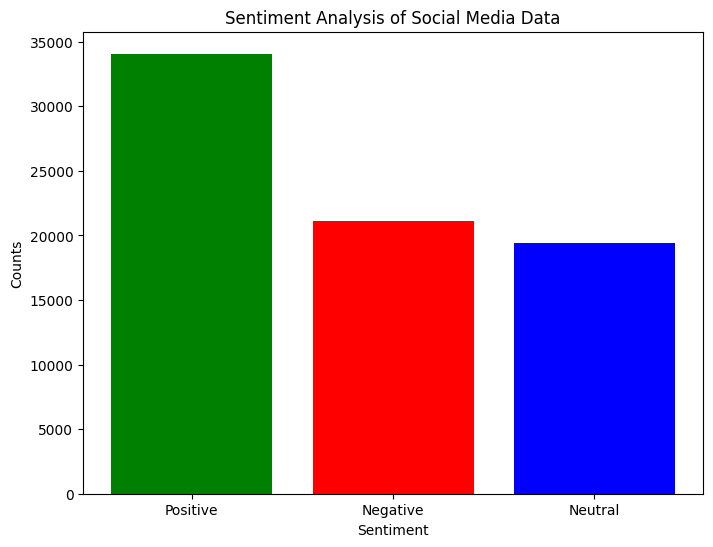

In [5]:
# Plot sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.title('Sentiment Analysis of Social Media Data')
plt.show()

In [6]:
import nltk

# Download the necessary NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

#Function to preprocess text
def preprocess_text(text):
    #removing the punctuation, numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '',text,re.I|re.A)
    
    #Convert to lowercase
    text = text.lower()
    #Tokenize the text
    tokens = text.split()
    
    #Remove the stop words do stemming
    tokens =  [stemmer.stem(word) for word in tokens if word not in stop_words]
    return  ' '.join(tokens)

In [8]:
df['preprocessed_text']=df['Text'].apply(preprocess_text)
print(df[['Text','preprocessed_text']].head())

                                                Text  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

           preprocessed_text  
0   im get borderland murder  
1           come border kill  
2     im get borderland kill  
3  im come borderland murder  
4   im get borderland murder  


In [9]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features = 5000)
X = vectorizer.fit_transform(df['preprocessed_text'])
y = df['Sentiment']
print(X.shape,y.shape)

(74682, 5000) (74682,)


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',splitter = "random")
clf.fit(X_train,y_train)

DecisionTreeClassifier(splitter='random')

0.9028341887971435


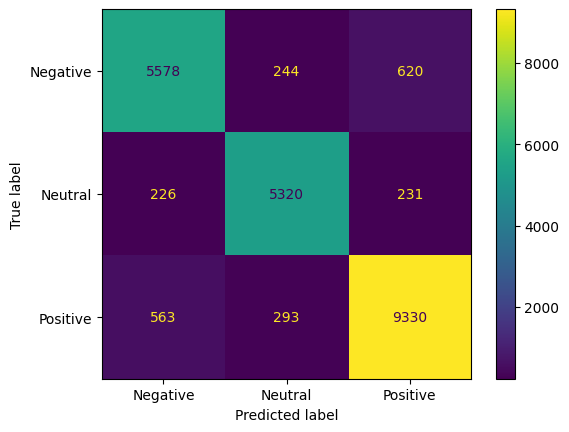

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [13]:
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)

    # Transform the preprocessed text into TF-IDF vectors
    X_new = vectorizer.transform([preprocessed_text])

    # Make predictions
    predicted_sentiment = clf.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [14]:
predict_sentiment("I am feeling very happy today")

Predicted sentiment: ['Positive']
